
# breast cancer prediction 
based on digitized imaged of breast tissue

We are Yuval (206587982) and Gabriella (315478404), young computer science students who are passionate about data science and are very willing to learn new things. When we wondered which project we would like to do this semester, we  browsed Kaggle for an open competition. As  both of us never had a project  on Data science and Machine learning and  we are passionate about the medicine world, a competition related to diagnosing cancer was very appealing. The competition's purpose is to predict wether the cancer diagnosis is benign or malignant based on several observations/features.  Those features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass and  they describe characteristics of the cell nuclei present in the image 
(data from Wisconsin University Data Set).
# about breast cancer:
Breast cancer is cancer that forms in the cells of the breast. It has been identified as the second largest cause of cancer deaths among women of age 40 and 55. The number of breast cancer diagnosis among women is estimated to be 1.2 million  every year according to studies of the World Health Organization. According to the American cancer society,  in 2001, about 40,200 deaths were caused by breast cancers and there were 192,000 cases of newly diagnosed women. Additional statistics as of 2006 estimated 214,460 new cancer diagnosis and total death at least 41,000 within the US. Early detection and accurate diagnosis have been proved to be crucial to reduce the number of deaths and  increase the survival rate of those diagnosed with breast cancer.

# our problem:
The machine learning methodology has long been used in medical diagnosis. The Wisconsin Breast Cancer Database (WBCD) dataset released in the early 90's gained a recognition as one of the first milestones of AI and has been widely used in research experiments. The problem is how to diagnose whether or not the patient has breast cancer.
This problem is treated as a 2- class (B-benign, M-malignant) classification problem.



In the data, there is a list of 10 differents features:
-  Radius - mean of distances from center to points on the perimeter.
-  Texture - standard deviation of gray-scale value.
-  Perimeter 
-  Area
-  Smoothness - Local variation in radius lengths.
-  Compactness - (perimeter^2 / area - 1.0) 
-  Concavity - Severity of concave portions of the contour.
-  Concave points - Number of concave portions of the contour.
-  Symmetry - Relative difference of two half-planes.
-  Fractal dimension - ("coastline approximation" - 1)

For each feature the dataset include the mean value, standard error and worst value(mean of 3 max values). 

Class distribution: 357 benign, 212 malignant


         
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQjuiDaPbVi3jtsh-uepYaqpN-iX3SuDAmiIg&usqp=CAU=" width=900 height=900 />




# EXPLORING THE DATA:

# Import Libraries

Before well start our journey and analyse the DB first we need to import our ML libraries
Sklearn is a open source library for ML and Data science algorithms . It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.
Sklearn is simple and efficient tools for predictive data analysis and built on NumPy, SciPy, and matplotlib.

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn is a library for making statistical graphics . It builds on top of matplotlib and integrates closely with pandas data structures.

Pandas and Numpy are a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.


In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd  # Import Pandas for data manipulation using dataframes
import numpy as np  # Import Numpy for data statistical analysis
import matplotlib.pyplot as plt  # Import matplotlib for data visualisation
import seaborn as sns  # Statistical data visualization
# %matplotlib inline

# Import Cancer data drom the Sklearn library

Our Data saves under the file "BreastCancerDetection.csv" in this direcory

In [2]:
data = pd.read_csv("BreastCancerDetection.csv")

Let's Present the data and visulize it 

In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


The info method print a concise summary of a DataFrame.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

we can see we have 569 lines of data.
no missing data.

let's look at the dispartion of the data:

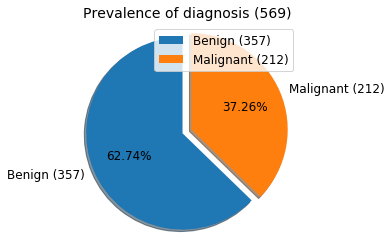

In [5]:
sum_D = len(data['diagnosis'])
sum_M = (data['diagnosis'].values=='M').sum()
sum_B = sum_D - sum_M
frac_B = sum_B/sum_D
frac_M = 1 - frac_B
labels = 'Benign ('+str(sum_B)+')', 'Malignant ('+str(sum_M)+')'
sizes = [frac_B, frac_M]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(4, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90, textprops={'fontsize': 12})

ax1.set_title('Prevalence of diagnosis ('+str(sum_D)+')', fontsize=14)
ax1.axis('equal')
ax1.legend(fontsize=12, loc='best')
plt.show()

we have 357 benign cases and 212 malignant cases, that mean we have example of both clastifications, we dont have a 50-50 datatset but it will be good enough.

the indexes are:

We can see the first column is "ID" and the last one is "Unnamed: 32"

Clearly both of them aren't Relevant to analyse the data

So we remove them..

In [6]:
#remove id and Unnamed: 32
data=data.iloc[:,1:-1]
# Let's print again the remains keys/columns 
data.keys()

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [7]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The word “normalization” is used informally in statistics, when you normalize data you eliminate the units of measurement for data, enabling you to more easily compare data from different places.
let's see if we need to normalize the data:


[Text(0, 0, 'radius_mean'),
 Text(0, 0, 'texture_mean'),
 Text(0, 0, 'perimeter_mean'),
 Text(0, 0, 'area_mean'),
 Text(0, 0, 'smoothness_mean'),
 Text(0, 0, 'compactness_mean'),
 Text(0, 0, 'concavity_mean'),
 Text(0, 0, 'concave points_mean'),
 Text(0, 0, 'symmetry_mean'),
 Text(0, 0, 'fractal_dimension_mean')]

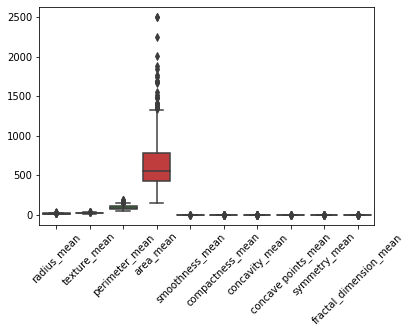

In [8]:
chart = sns.boxplot(data=data.iloc[:,1:11])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

we can see that the data is very diverse so we will need to normalized the data before we start working on it

let's look a little bit about connections between the diffrent features, we will look on the means values in order to keep a small amound of graphs

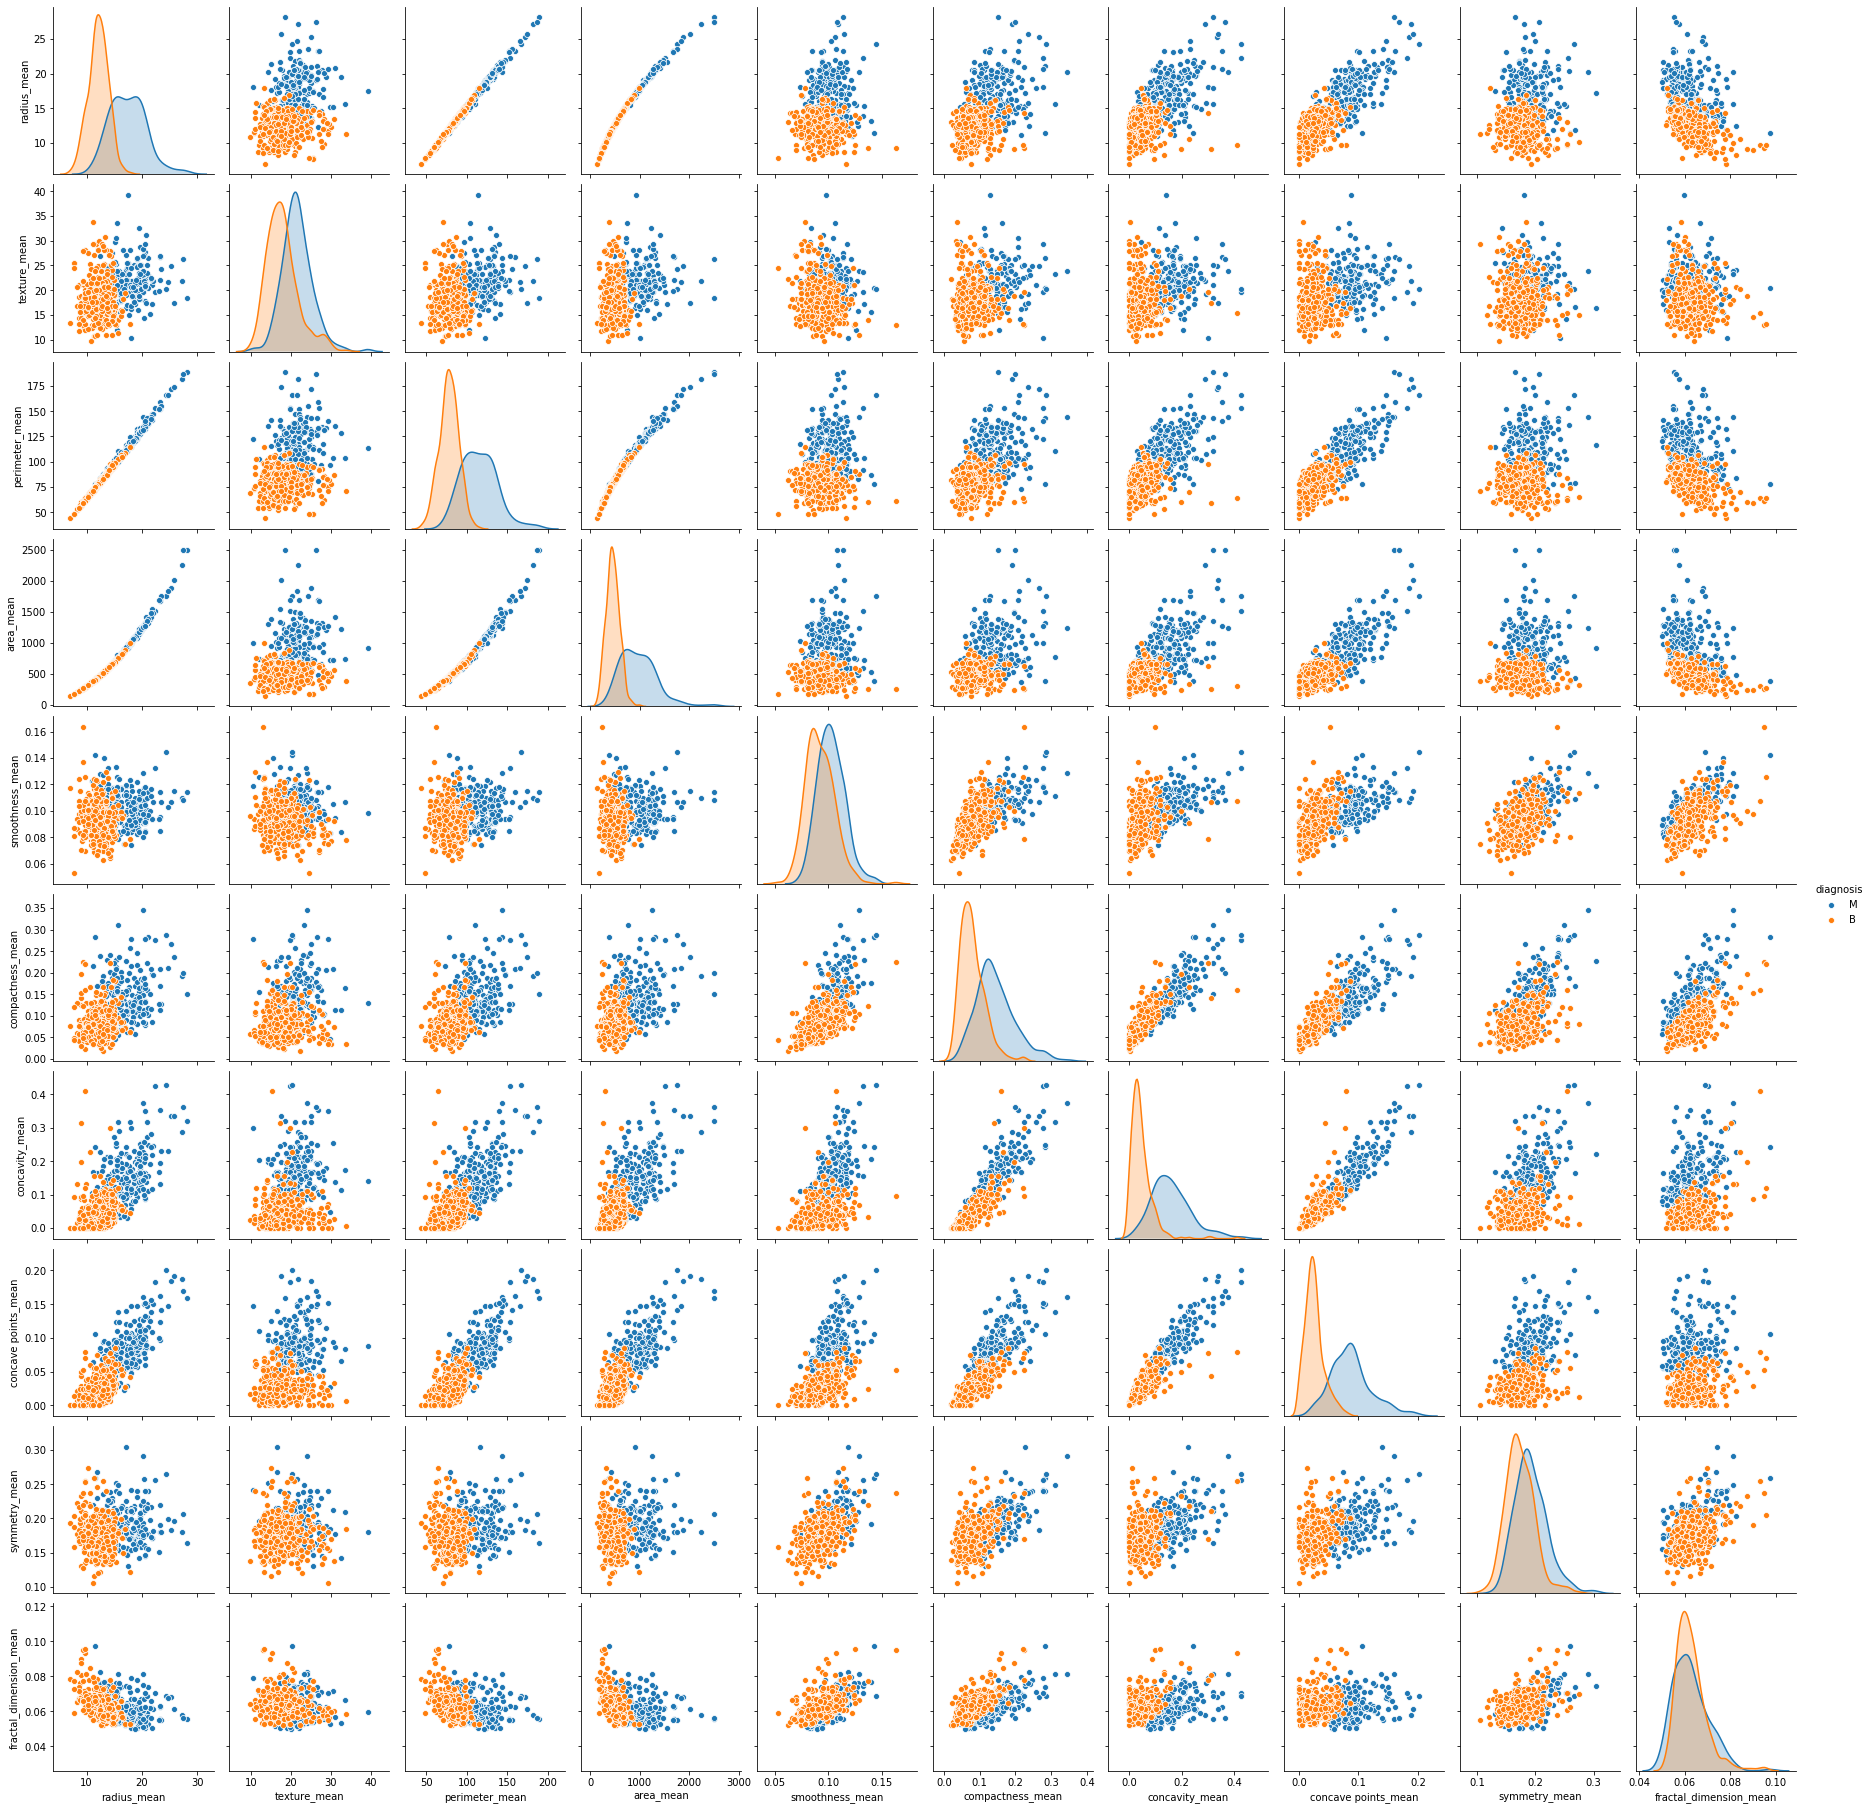

In [9]:
sns.pairplot(data, hue = 'diagnosis', vars = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',] )


at first look we can see the data is diffrent between the benign and malignant cases in some of the parameters- look like someting possible

let's try to visualize diffrences between benign and malignant in another way- looking at only one feature at a time:

In [10]:
features_mean= list(data.columns[1:11])

 Those are practicly our best parameters to extricate the rules we want

features_mean= ['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']
 
 
matplotlib.pyplot is a state-based interface to matplotlib. It provides a MATLAB-like way of plotting.
pyplot is mainly intended for interactive plots and simple cases of programmatic plot generation 



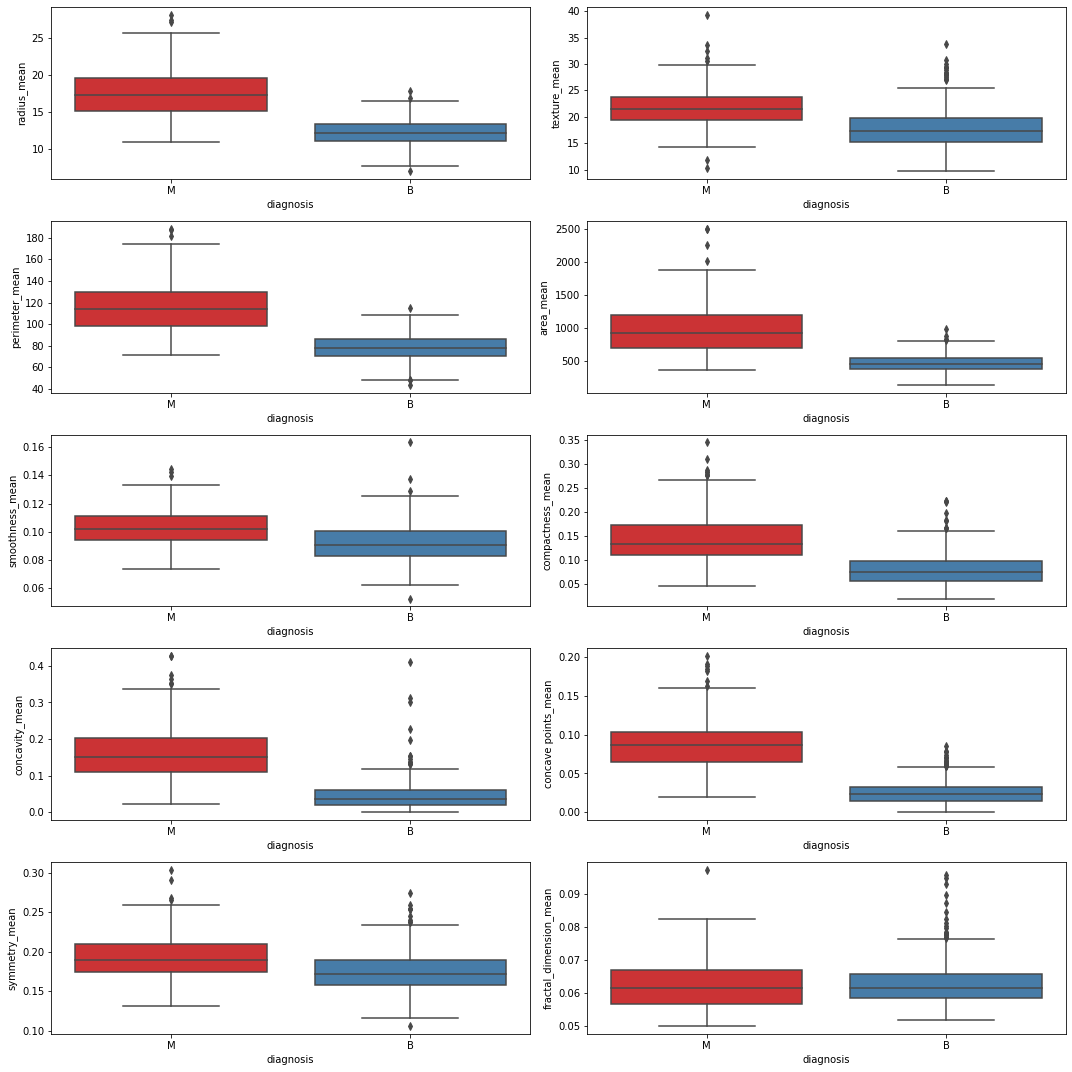

In [11]:
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.boxplot(x='diagnosis', y=feature, data=data, palette="Set1")

plt.tight_layout()
plt.show()

another  way to look at connections between features is correlation matrix:
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.
Most correlation matrixes use Pearson’s Product-Moment Correlation (r). It is also common to use Spearman’s Correlation and Kendall’s Tau-b

lighter colors mean stronger correlation

not suprising to see strong correlation between perimeter and area

Lets us explain more :

Value of 1 represents perfect correlation between 2 variables. If the first one get value X the second gets the same value . They are perfectly match for one another and it make sense that every variable gets correlation of -1 with himself.

Value of -1 represents perfect Negative correlation between 2 variables. If the first one get value X the second gets the opposite . They are perfectly opposites match for one another.

Value of 0 represents No  correlation between 2 variables. They are not related at all and there is not connection between them .




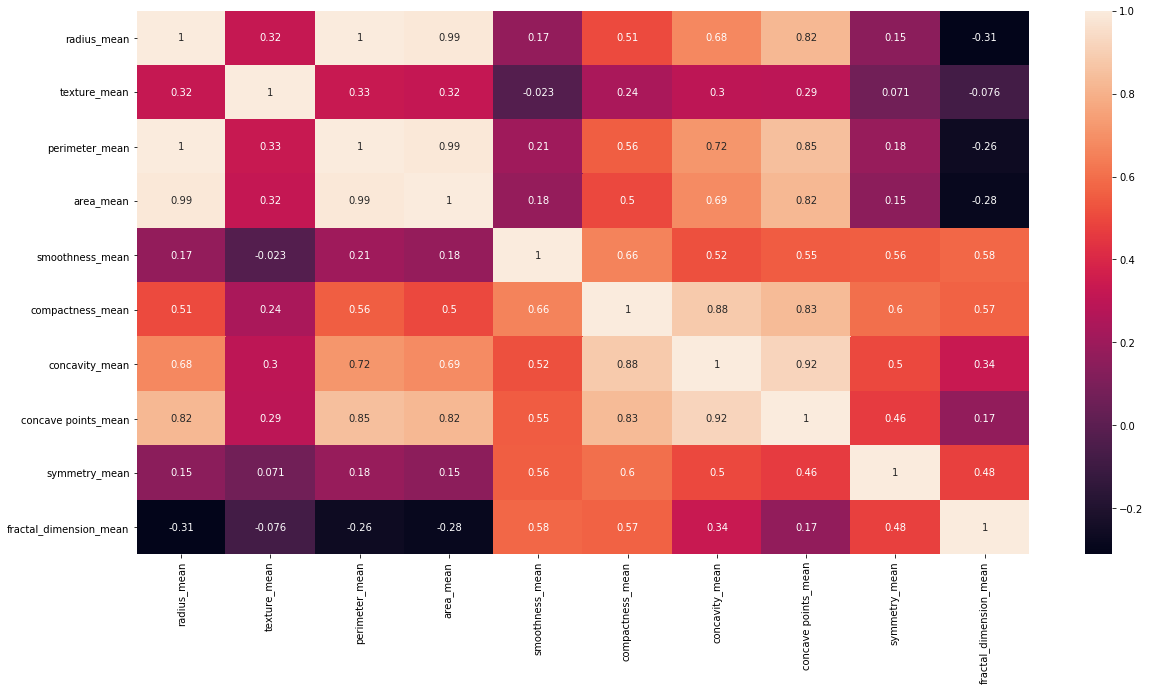

In [12]:
# Let's check the correlation between the variables 
plt.figure(figsize=(20,10)) 
sns.heatmap((data.iloc[:,1:11]).corr(), annot=True)

sns.distplot is a Flexibly plot a univariate distribution of observations.
This function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn kdeplot() and rugplot() functions. It can also fit  distributions - which it was we use here

Note : 

kdeplot
Show a univariate or bivariate distribution with a kernel density estimate.

rugplot
Draw small vertical lines to show each observation in a distribution.


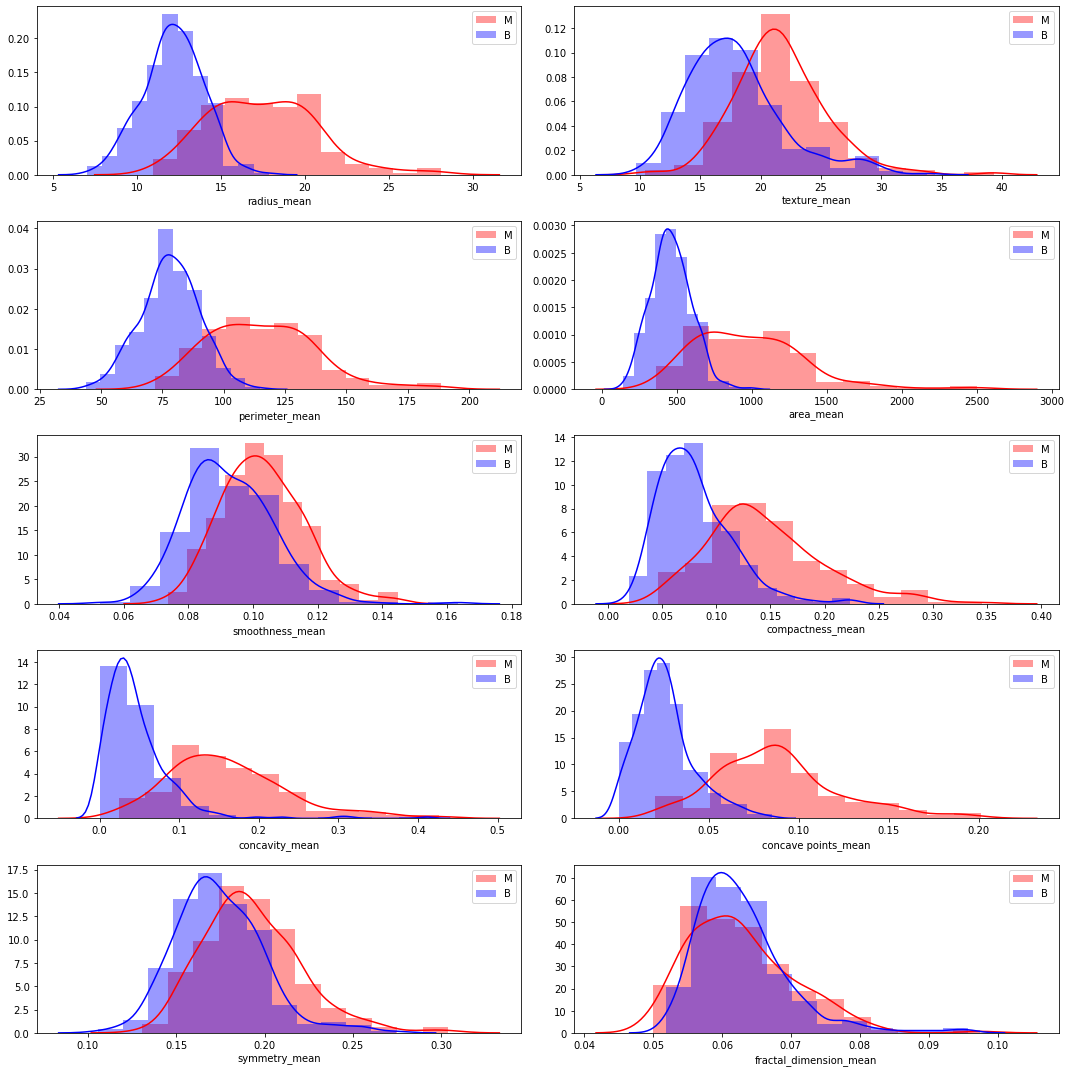

In [13]:
bins = 12
features_selection = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean']
features_mean= list(data.columns[1:11])

plt.figure(figsize=(15,15))

for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.distplot(data[data['diagnosis']=='M'][feature], bins=bins, color='red', label='M');
    sns.distplot(data[data['diagnosis']=='B'][feature], bins=bins, color='blue', label='B');
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Models 
Since it's our first project ion data science we start exploring diffrents models in order to solve the problem. First we start with few models of sklearn and then after we felt more comfortable we continue to tensorflow and pytorch models.
first we start with spliting the data in order to train the model on a training set and then evalueting it with the test set.

# Normalize and split the data

Simply put, a z-score (also called a standard score) gives you an idea of how far from the meana data point is.
But more technically it’s a measure of how many standard deviations below or above the population mean
a raw score is.

A z-score can be placed on a normal distribution curve.
Z-scores range from -3 standard deviations (which would fall to the far left of the normal distribution curve) 
up to +3 standard deviations (which would fall to the far right of the normal distribution curve).

And represents by the formula :
z = (x – μ) / σ



# Cross-validation

Cross-validation is a technique for validating the model efficiency by training it on the subset of input data and testing on previously unseen subset of the input data. We can also say that it is a technique to check how a statistical model generalizes to an independent dataset.

In machine learning, there is always the need to test the stability of the model. It means based only on the training dataset; we can't fit our model on the training dataset. For this purpose, we reserve a particular sample of the dataset, which was not part of the training dataset. After that, we test our model on that sample before deployment, and this complete process comes under cross-validation. 

There are some common methods that are used for cross-validation. These methods are given below:

Validation Set Approach
Leave-P-out cross-validation
Leave one out cross-validation
K-fold cross-validation
Stratified k-fold cross-validation


train_test_split: Split arrays or matrices into random train and test subsets
We devide our data into 2 groups , Usually the train set is bigger then the test set (75%, 25%)



In [14]:
#looking for exceptions
from scipy.stats import zscore

z = np.abs(zscore(data.iloc[:,1:]))

X = data.drop(['diagnosis'],axis=1) # All the data with out the diagnosis col - meaning the data we build the model with
y = data['diagnosis'] # The diagnosis col , using that we can avalute our Accuracy percentages

#normalize the data
X_standard = X.apply(zscore)

#split into test and train group
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state=5)

Let's see what we get after spliting:

In [15]:
X_train.shape

(369, 30)

In [16]:
X_test.shape

(200, 30)

we have 2 group both with 30 features, the training setis with 426 lines and the test set with 143 examples. this size is define in test_size parameter where we chose 25% of the data for the testing set.

first we try some models from sklearn:

# # SVM


Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine.

Hyperplane: There can be multiple lines/decision boundaries to segregate the classes in n-dimensional space, but we need to find out the best decision boundary that helps to classify the data points. This best boundary is known as the hyperplane of SVM.

The dimensions of the hyperplane depend on the features present in the dataset, which means if there are 2 features, then hyperplane will be a straight line. And if there are 3 features, then hyperplane will be a 2-dimension plane.

We always create a hyperplane that has a maximum margin, which means the maximum distance between the data points.

SVM can be of two types:

Linear SVM: Linear SVM is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as Linear SVM classifier.

Non-linear SVM: Non-Linear SVM is used for non-linearly separated data, which means if a dataset cannot be classified by using a straight line, then such data is termed as non-linear data and classifier used is called as Non-linear SVM classifier.



We Compute a matrix to evaluate the accuracy of a classification. 
This is a specific table layout that allows visualization of the performance of an algorithm

By definition a confusion matrix C is such that Cij is equal to the number of
observations known to be in group i and predicted to be in group j.

condition positive (P):
the number of real positive cases in the data
condition negative (N):
the number of real negative cases in the data

We have 4 types here :
    
    true positive (TP):
        eqv. with hit
    true negative (TN):
        eqv. with correct rejection
    false positive (FP):
        eqv. with false alarm, Type I error
    false negative (FN):
        eqv. with miss, Type II error


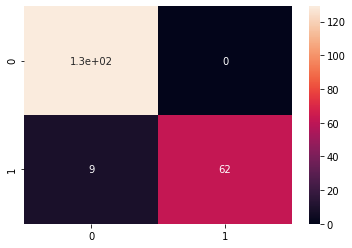

In [17]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

#define model
svc_model = SVC()
svc_model.fit(X_train, y_train)

#evaluate model
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

Build a text report showing the main classification metrics.


# precision and recall

In pattern recognition, information retrieval and machine learning, precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of the total amount of relevant instances that were actually retrieved. Both precision and recall are therefore based on an understanding and measure of relevance.

Suppose a computer program for recognizing dogs in photographs identifies 8 dogs in a picture containing 12 dogs and 10 cats. Of the 8 identified as dogs, 5 actually are dogs (true positives), while the rest are cats (false positives). The program's precision is 5/8 while its recall is 5/12. When a search engine returns 30 pages, only 20 of which were relevant, while failing to return 40 additional relevant pages, its precision is 20/30 = 2/3 while its recall is 20/60 = 1/3. So, in this case, precision is "how valid the search results are", and recall is "how complete the results are".

Precision = TP / (TP+FP)

Recall = TP / (TP+FN)

Accuracy = TP+ TN / (TP + TN + FP+ FN)


In [18]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           B       0.93      1.00      0.97       129
           M       1.00      0.87      0.93        71

    accuracy                           0.95       200
   macro avg       0.97      0.94      0.95       200
weighted avg       0.96      0.95      0.95       200



Here we scored accuracy of 65% . We can do better, lets continue to the next algorithm 

# Improve the model

GridSearchCV: Exhaustive search over specified parameter values for an estimator.

param_grid : dict or list of dictionaries
Dictionary with parameters names (string) as keys and lists of parameter settings to try as values,
or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored.
This enables searching over any sequence of parameter settings.

Functions :

best_estimator_ : Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data. Not available if refit=False.

best_score_ :  Score of best_estimator on the left out data.

best_params_ : Parameter setting that gave the best results on the hold out data.

In [19]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [20]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.608, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.622, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.622, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.622, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.616, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.608, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.608, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.622, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.622, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.622, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.616, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.608, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.622, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [21]:
grid.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 'iid': 'deprecated',
 'n_jobs': None,
 'param_grid': {'C': [0.1, 1, 10, 100],
  'gamma': [1, 0.1, 0.01, 0.001],
  'kernel': ['rbf']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose':

In [22]:
grid.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [23]:
grid.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

              precision    recall  f1-score   support

           B       0.98      0.95      0.96       129
           M       0.91      0.96      0.93        71

    accuracy                           0.95       200
   macro avg       0.94      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



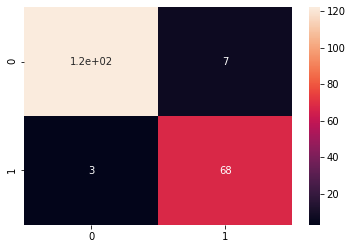

In [24]:
grid_predictions = grid.predict(X_test)
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True)
print(classification_report(y_test,grid_predictions))

 Here we scored accuracy of 95% . Thats pretty good ,lets continue to the next algorithm 
 
 We can also see the percision is 94% and recall  95% . 

# KNN 

k-nearest neighbors algorithm (k-NN)
In k-NN classification, the output is a class membership. 
An object is classified by a plurality vote of its neighbors, 
with the object being assigned to the class most common among its k nearest neighbors 
(k is a positive integer, typically small).
If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
In k-NN regression, the output is the property value for the object.
This value is the average of the values of k nearest neighbors.

The function is only approximated locally and all computation is deferred until function evaluation. Since this algorithm relies on distance for classification, normalizing the training data can improve its accuracy dramatically.


The best choice of k depends upon the data; generally, larger values of k reduces effect of the noise on the classification, but make boundaries between classes less distinct. A good k can be selected by various heuristic techniques. The special case where the class is predicted to be the class of the closest training sample (i.e. when k = 1) is called the nearest neighbor algorithm.

The accuracy of the k-NN algorithm can be severely degraded by the presence of noisy or irrelevant features, or if the feature scales are not consistent with their importance. 


p: type - int, default=2
Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

n_neighbors: type - int, default=5
Number of neighbors to use by default for kneighbors queries.

metric:  type - str , default=’minkowski’
the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. 

              precision    recall  f1-score   support

           B       0.95      0.98      0.96       129
           M       0.96      0.90      0.93        71

    accuracy                           0.95       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.95      0.95       200



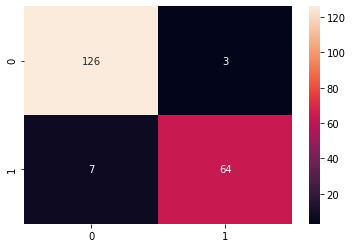

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

#define model
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

#evaluate model
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt="d")
print(classification_report(y_test, y_predict))

Here we scored accuracy of 95% . Thats pretty good ,lets continue to the next algorithm

We can also see the percision is 95% and recall 94% .

# K means

that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. 
k-means clustering minimizes within-cluster variances (squared Euclidean distances)
The problem is computationally difficult (NP-hard); however, efficient heuristic algorithms converge quickly to a local optimum. 

The algorithm has a loose relationship to the k-nearest neighbor classifier, a popular machine learning technique for classification that is often confused with k-means due to the name. Applying the 1-nearest neighbor classifier to the cluster centers obtained by k-means classifies new data into the existing cluster

Given a set of observations (x1, x2, ..., xn), where each observation is a d-dimensional real vector, k-means clustering aims to partition the n observations into k (≤ n) sets S = {S1, S2, ..., Sk} so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance). 

Assignment step: Assign each observation to the cluster with the nearest mean: that with the least squared Euclidean distance. (Mathematically, this means partitioning the observations according to the Voronoi diagram generated by the means.)

The algorithm is often presented as assigning objects to the nearest cluster by distance. Using a different distance function other than (squared) Euclidean distance may stop the algorithm from converging. Various modifications of k-means such as spherical k-means and k-medoids have been proposed to allow using other distance measures.


The algorithm has converged when the assignments no longer change. The algorithm does not guarantee to find the optimum.

Complexity:

    NP-hard in general Euclidean space (of d dimensions) even for two clusters

    NP-hard for a general number of clusters k even in the plane

    if k and d (the dimension) are fixed, the problem can be exactly solved in time O(n^(kd+1))



KNeighborsClassifier is a function for classifier implementing the k-nearest neighbors vote.

First we get normalize the data again and split it to 2 groups - TRAIN and TEST 

In [26]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

import numpy as numpyInstance
import pandas as pandasInstance
import matplotlib.pyplot as matplotlibInstance
import seaborn as seabornInstance

#looking for exceptions
from scipy.stats import zscore


z = np.abs(zscore(data.iloc[:,1:]))
X_standard = X.apply(zscore)

from sklearn.preprocessing import StandardScaler
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.25, random_state=5)

In [27]:
X_area_mean = data['area_mean']
X_smoothness_mean=data["smoothness_mean"]
X_radius_mean= data["radius_mean"]
y = data['diagnosis']

pairwise_distances_argmin: 
Compute minimum distances between one point and a set of points.
This function computes for each row in X, the index of the row of Y which is closest (according to the specified distance). The minimal distances are also returned

See how the data is distributed accross the cluster in terms of B-benign, M-malignant

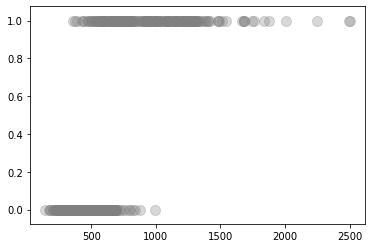

In [28]:
from sklearn.metrics import pairwise_distances_argmin

plt.scatter(X_area_mean, y, c='gray', s=50 * 2, alpha=0.3);

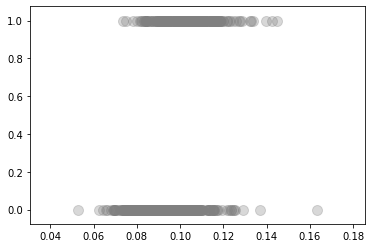

In [29]:
plt.scatter(X_smoothness_mean, y, c='gray', s=50 * 2, alpha=0.3);

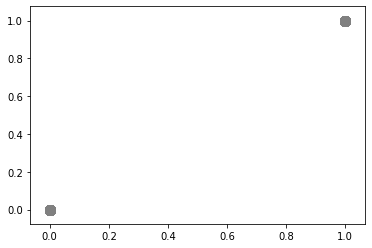

In [30]:
plt.scatter(y, y, c='gray', s=50 * 2, alpha=0.3);

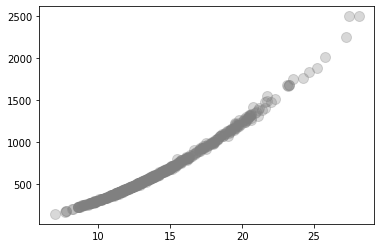

In [31]:
plt.scatter(X_radius_mean, X_area_mean, c='gray', s=50 * 2, alpha=0.3);

In [32]:
X_new = np.c_[X_area_mean, y]
X_new

array([[1.001e+03, 1.000e+00],
       [1.326e+03, 1.000e+00],
       [1.203e+03, 1.000e+00],
       ...,
       [8.581e+02, 1.000e+00],
       [1.265e+03, 1.000e+00],
       [1.810e+02, 0.000e+00]])

Text(0, 0.5, 'area_mean')

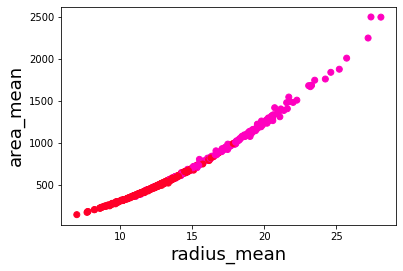

In [33]:
#X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.25, random_state=5)
plt.scatter(X["radius_mean"], X['area_mean'], c=y, cmap='gist_rainbow')
plt.xlabel('radius_mean', fontsize=18)
plt.ylabel('area_mean', fontsize=18)

Text(0, 0.5, 'smoothness_mean')

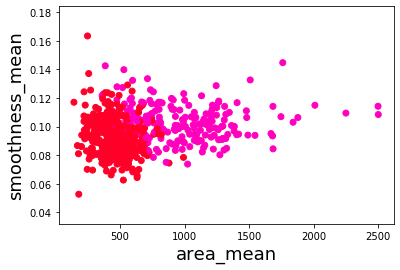

In [34]:
#X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.25, random_state=5)
plt.scatter(X["area_mean"], X['smoothness_mean'], c=y, cmap='gist_rainbow')
plt.xlabel('area_mean', fontsize=18)
plt.ylabel('smoothness_mean', fontsize=18)

Text(0, 0.5, 'smoothness_mean')

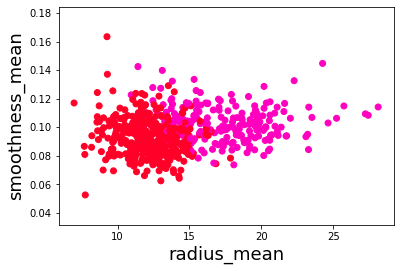

In [35]:
#X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.25, random_state=5)
plt.scatter(X["radius_mean"], X['smoothness_mean'], c=y, cmap='gist_rainbow')
plt.xlabel('radius_mean', fontsize=18)
plt.ylabel('smoothness_mean', fontsize=18)

Create the model classifier and fit it to the data - meaning train it on the model TRAIN group 

After finishing the fitting stages we predict our data on the TEST group . and avalute it compare to the y_test values

In [36]:
knModel = KNeighborsClassifier(n_neighbors=1)
knModel.fit(X_train,y_train)
predictions = knModel.predict(X_test)
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           B       0.97      0.96      0.96        89
           M       0.93      0.94      0.94        54

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



After comparing 143 Observations We scored:
    95% accuracy & precision & recall
    


Here we are Calculating predictions for each Value of K from 1 to 50 and Calculating the Average Error Value and Storing it in ERROR.



numpyInstance.mean : 

Returns the average of the array elements.
Masked entries are ignored. The average is taken over the flattened array by default,

In [37]:
errors = []
for number in range(1,50):
    anOtherModel = KNeighborsClassifier(n_neighbors=number)
    anOtherModel.fit(X_train,y_train)
    anOtherpredictions = anOtherModel.predict(X_test)
    errors.append(numpyInstance.mean(predictions!=y_test))

BETA VERSION FOR PERCISION AND RECALL

In [38]:
def computing(cm):
    Eba = cm[1,0]
    Eca = cm[2,0]
    Eab = cm[0,1]
    Ecb = cm[2,1]
    Eac = cm[0,2]
    Ebc = cm[1,2]
    TPa = cm[0,0]
    TPb = cm[1,1]
    TPc = cm[2,2]
    FNa = Eba+Eca
    FNb = Eab+Ecb
    FNc = Eac+Ebc
    FPa = Eab+Eac
    FPb = Eba+Ebc
    FPc = Eca+Ecb
    TNa = TPb+Ebc+Ecb+TPc
    TNb = TPa+Eac+Eca+TPc
    TNc = TPa+Eab+Eba+TPb
    Total = TPa+Eab+Eac+Eba+TPb+Ebc+Eca+Ecb+TPc
    accuracy = (TPa+TPb+TPc)/Total
    sensitivityA = (TPa)/(TPa+FNa)
    sensitivityB = (TPb)/(TPb+FNb)
    sensitivityC = (TPc)/(TPc+FNc)
    specificityA = (TNa)/(TNa+FPa)
    specificityB = (TNb)/(TNb+FPb)
    specificityC = (TNc)/(TNc+FPc)
    print("accuracy: ",accuracy)
    print("sensitivityA: ",sensitivityA)
    print("sensitivityB: ",sensitivityB)
    print("sensitivityC: ",sensitivityC)
    print("specificityA: ",specificityA)
    print("specificityB: ",specificityB)
    print("specificityC: ",specificityC)
    
    matrisim=[["accuracy: ",accuracy],["sensitivityA: ",sensitivityA],
          ["sensitivityB: ",sensitivityB],["sensitivityC: ",sensitivityC],
          ["specificityA: ",specificityA],["specificityB: ",specificityB],
          ["specificityC: ",specificityC]
          ]
    return matrisim

Text(0, 0.5, 'Error Rate')

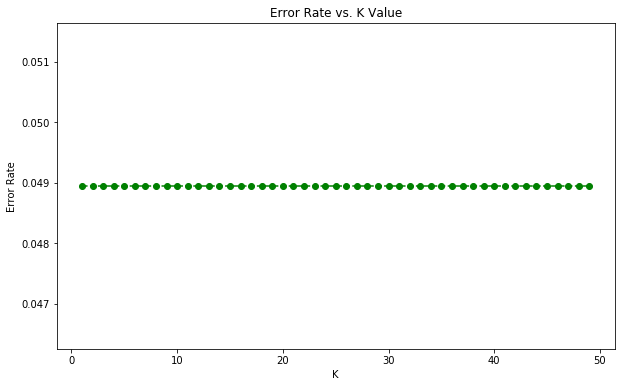

In [39]:
matplotlibInstance.figure(figsize=(10,6))
matplotlibInstance.plot(range(1,50),errors,color='green', linestyle='dashed', marker='o')
matplotlibInstance.title('Error Rate vs. K Value')
matplotlibInstance.xlabel('K')
matplotlibInstance.ylabel('Error Rate')

This Means that we are already at the Best Accuracy so Value of K=1 is already perfect.

# Decision tree

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.


In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.

The decisions or the test are performed on the basis of features of the given dataset.

In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.

A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.

Why to use it :

Decision Trees usually mimic human thinking ability while making a decision, so it is easy to understand.

The logic behind the decision tree can be easily understood because it shows a tree-like structure.


How does the Decision Tree algorithm Work?

In a decision tree, for predicting the class of the given dataset, the algorithm starts from the root node of the tree. This algorithm compares the values of root attribute with the record (real dataset) attribute and, based on the comparison, follows the branch and jumps to the next node.

For the next node, the algorithm again compares the attribute value with the other sub-nodes and move further. It continues the process until it reaches the leaf node of the tree. The complete process can be better understood using the below algorithm:

Step-1: Begin the tree with the root node, says S, which contains the complete dataset.

Step-2: Find the best attribute in the dataset using Attribute Selection Measure (ASM).

Step-3: Divide the S into subsets that contains possible values for the best attributes.

Step-4: Generate the decision tree node, which contains the best attribute.

Step-5: Recursively make new decision trees using the subsets of the dataset created in step -3. Continue this process until a stage is reached where you cannot further classify the nodes and called the final node as a leaf node.

Attribute Selection Measures: 
While implementing a Decision tree, the main issue arises that how to select the best attribute for the root node and for sub-nodes. So, to solve such problems there is a technique which is called as Attribute selection measure or ASM. By this measurement, we can easily select the best attribute for the nodes of the tree. There are two popular techniques for ASM, which are:

1)Information Gain

2)Gini Index


Information Gain:

Information gain is the measurement of changes in entropy after the segmentation of a dataset based on an attribute.
It calculates how much information a feature provides us about a class.
According to the value of information gain, we split the node and build the decision tree.
A decision tree algorithm always tries to maximize the value of information gain, and a node/attribute having the highest information gain is split first. It can be calculated using the below formula:

Information Gain= Entropy(S)- [(Weighted Avg) *Entropy(each feature)

Entropy: Entropy is a metric to measure the impurity in a given attribute. It specifies randomness in data. Entropy can be calculated as:

Entropy(s)= -P(yes)log2 P(yes)- P(no) log2 P(no)

S= Total number of samples
P(yes)= probability of yes
P(no)= probability of no

Gini Index:

Gini index is a measure of impurity or purity used while creating a decision tree in the CART(Classification and Regression Tree) algorithm.
An attribute with the low Gini index should be preferred as compared to the high Gini index.
It only creates binary splits, and the CART algorithm uses the Gini index to create binary splits.
Gini index can be calculated using the below formula:

Gini Index= 1- ∑j Pj^2


Advantages of the Decision Tree:

1)It is simple to understand as it follows the same process which a human follow while making any decision in real-life.
2)It can be very useful for solving decision-related problems.
3)It helps to think about all the possible outcomes for a problem.
4)There is less requirement of data cleaning compared to other algorithms.

Disadvantages of the Decision Tree:

1)The decision tree contains lots of layers, which makes it complex.
2)It may have an overfitting issue, which can be resolved using the Random Forest algorithm.
3)For more class labels, the computational complexity of the decision tree may increase



In [40]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
feature_importances = pd.DataFrame(decision_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [41]:
feature_importances

,importance
concave points_worst,0.707189
area_worst,0.099616
perimeter_se,0.028365
concavity_worst,0.027071
perimeter_mean,0.021975
texture_mean,0.021603
radius_worst,0.019006
texture_worst,0.018112
fractal_dimension_mean,0.014410
area_se,0.009956


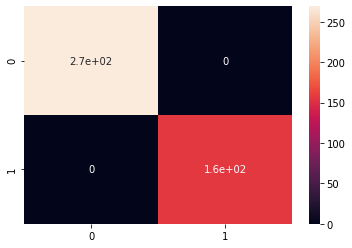

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = decision_tree.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

              precision    recall  f1-score   support

           B       0.95      0.98      0.96        88
           M       0.96      0.91      0.93        55

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



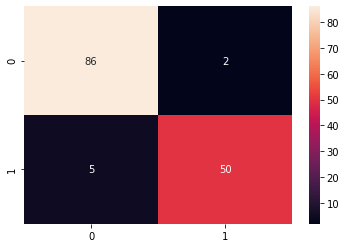

In [43]:
# Predicting the Test set results
y_predict_test = decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_test))

# extra tree classtifier

An extremely randomized tree classifier.

Extra-trees differ from classic decision trees in the way they are built. When looking for the best split to separate the samples of a node into two groups, random splits are drawn for each of the max_features randomly selected features and the best split among those is chosen. When max_features is set 1, this amounts to building a totally random decision tree.

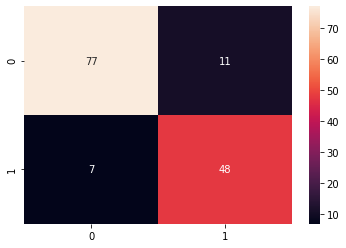

In [44]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Define model. Specify a number for random_state to ensure same results each run
try_model = ExtraTreeClassifier(random_state=1)

# Fit model
try_model.fit(X_train, y_train)

#check prediction
y_predict = try_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True)

# Random Forest

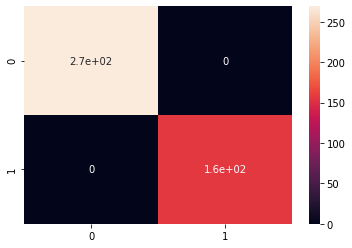

In [45]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=150)
RandomForest.fit(X_train, y_train)

y_predict_train = RandomForest.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

              precision    recall  f1-score   support

           B       0.97      1.00      0.98        88
           M       1.00      0.95      0.97        55

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



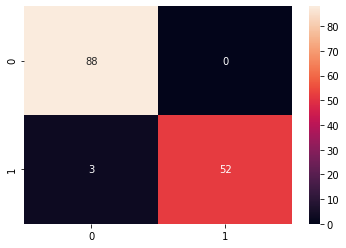

In [46]:
# Predicting the Test set results
y_predict_test = RandomForest.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_test))

# Naive Bayes

In [47]:
from sklearn.preprocessing import StandardScaler
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
y = data['diagnosis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.2)

from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report, confusion_matrix
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

In [ ]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

In [ ]:
sum(y_test)

# Logistic Regression

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


In [ ]:
y_predict_train = classifier.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
y_predict_test = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

# neural network multi layer perspetron

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Define model. Specify a number for random_state to ensure same results each run
try_model = MLPClassifier()

# Fit model
try_model.fit(X_train, y_train)

#check prediction
y_predict = try_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True)

In [ ]:
  from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

# bernuli&linear regression

In [48]:
from sklearn.neural_network import BernoulliRBM
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import clone


# Define model. Specify a number for random_state to ensure same results each run
logistic = linear_model.LogisticRegression(solver='newton-cg', tol=1)
rbm = BernoulliRBM(random_state=0, verbose=True)

rbm_features_classifier = Pipeline(
    steps=[('rbm', rbm), ('logistic', logistic)])

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 10
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 6000

# Fit model
rbm_features_classifier.fit(X_train, y_train)

#check prediction
y_predict = rbm_features_classifier.predict(X_test)
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(y_test, y_predict)))


sns.heatmap(cm, annot=True)

#accuracy and f1
from sklearn.metrics import accuracy_score, classification_report, f1_score
acc = accuracy_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict, average='macro')
f'The accuracy is %.2f     The f1_score is %.2f' % (acc,f1)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -60.34, time = 0.01s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -109.95, time = 0.03s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -157.45, time = 0.01s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -203.87, time = 0.02s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -250.09, time = 0.01s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -296.35, time = 0.01s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -342.72, time = 0.01s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -389.21, time = 0.01s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -435.79, time = 0.01s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -482.44, time = 0.01s


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Gradient Decent 

In [49]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import time
start = time.time()
accuracy_selection=[]
cvs_selection=[]

clf = SGDClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# creating a combined model using 3 models
after we got very good result we thought maybe if we combine 3 models together and try to do an democratic vote between then we may get better result.

In [63]:
data = pd.read_csv("BreastCancerDetection.csv")
data =data.iloc[:,1:-1]
X = data.drop(['diagnosis'],axis=1)
y = data['diagnosis']

In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [71]:
d = pd.get_dummies(y)
y = d.drop('M', axis=1)
y

KeyError: "['M'] not found in axis"

we are doing again 3 models with good results:svc,neural network and bernouli
for each model we take the result in form of - or 1 instead of B or M in prder to make addition and get a "vote".

# svc

In [72]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

# Define model
svc_model = SVC()

# Fit model
svc_model.fit(X_train, y_train)

#check prediction
y_predict1 = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict1)

sns.heatmap(cm,annot=True,fmt="d")

#accuracy and f1
from sklearn.metrics import accuracy_score, classification_report, f1_score
acc = accuracy_score(y_test, y_predict1)
f1 = f1_score(y_test, y_predict1, average='macro')
f'The accuracy is %.2f     The f1_score is %.2f' % (acc,f1)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# neural network

In [62]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Define model. Specify a number for random_state to ensure same results each run
neuro_model = MLPClassifier()

# Fit model
neuro_model.fit(X_train, y_train)

#check prediction
y_predict2 = neuro_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict2)

sns.heatmap(cm, annot=True)

#accuracy and f1
from sklearn.metrics import accuracy_score, classification_report, f1_score
acc = accuracy_score(y_test, y_predict2)
f1 = f1_score(y_test, y_predict2, average='macro')
f'The accuracy is %.2f     The f1_score is %.2f' % (acc,f1)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# bernouliRBM

In [ ]:
from sklearn.neural_network import BernoulliRBM
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import clone


# Define model. Specify a number for random_state to ensure same results each run
logistic = linear_model.LogisticRegression(solver='newton-cg', tol=1)
rbm = BernoulliRBM(random_state=0, verbose=True)

rbm_features_classifier = Pipeline(
    steps=[('rbm', rbm), ('logistic', logistic)])

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 10
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 6000

# Fit model
rbm_features_classifier.fit(X_train, y_train)

#check prediction
y_predict3 = rbm_features_classifier.predict(X_test)
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(y_test, y_predict3)))

cm = confusion_matrix(y_test, y_predict3)
sns.heatmap(cm, annot=True)

#accuracy and f1
from sklearn.metrics import accuracy_score, classification_report, f1_score
acc = accuracy_score(y_test, y_predict3)
f1 = f1_score(y_test, y_predict3, average='macro')
f'The accuracy is %.2f     The f1_score is %.2f' % (acc,f1)

<h1> combined model

In [ ]:
y_predict=y_predict1+y_predict2+y_predict3

y_predict

In [ ]:
y_predict=y_predict//2
y_predict

In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

#accuracy and f1
from sklearn.metrics import accuracy_score, classification_report, f1_score
acc = accuracy_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict, average='macro')
f'The accuracy is %.2f     The f1_score is %.2f' % (acc,f1)

unfotunally it didn't work. 
we got same result as our best model, we think the reason is that the models make mistakes on the same objects so even when we try to make a  vote they make a mistake.

# VISUALISING PCA AND TENSERFLOW PLOTS

In [ ]:
# # Convert the diagnosis column to numeric format
# data['diagnosis'] = data['diagnosis'].factorize()[0]
# # Fill all Null values with zero
# data = data.fillna(value=0)
# # Store the diagnosis column in a target object and then drop it
# target = data['diagnosis']
# data = data.drop('diagnosis', axis=1)

In [ ]:
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.manifold import TSNE # TSNE module

In [ ]:
# Turn dataframe into arrays
X = data.values

# Invoke the PCA method. Since this is a binary classification problem
# let's call n_components = 2
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X)

# Invoke the TSNE method
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results = tsne.fit_transform(X)

In [ ]:
# Plot the TSNE and PCA visuals side-by-side
plt.figure(figsize = (16,11))
plt.subplot(121)
plt.scatter(pca_2d[:,0],pca_2d[:,1], c = target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.subplot(122)
plt.scatter(tsne_results[:,0],tsne_results[:,1],  c = target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()

# PCA

In [ ]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train

In [ ]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_



In [ ]:
explained_variance

In [ ]:

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d")
print(classification_report(y_test, y_pred))

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))



In [ ]:
X2.ravel().shape

In [ ]:
classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape).shape

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.colors

# z = np.exp(-X1**2-X2**2)*1.5+0.2

# colors = ["red", "blue"]
# cmap= matplotlib.colors.ListedColormap(colors)
# boundaries=[z.min(), 0.35, 0.7, 1.05, 1.4, z.max()]

# m = plt.contourf(X1, X2, z, levels = boundaries, cmap=cmap)

# plt.colorbar(m, spacing="proportional")
# plt.show()

In [ ]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), cmap = ListedColormap(("red","blue")))



# Keras and Tenserflow 

after working on models from sklearn we felt comfortable enough to start more complicate model and try tensorflow and pytorch
westarted with a sequential model from tensorflow 


In [54]:
x_standard = X.apply(zscore)
x_standard.describe()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_standard, y, test_size=0.3, random_state=1)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.7, random_state=1)

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
def baseline_model(units1, units2, dropout):
    model = Sequential()
    model.add(Dense(units1, input_shape=(30,), activation='relu'))
    model.add(Dropout(dropout))
    model.add(BatchNormalization(axis=1))
    model.add(Dense(units2, activation='relu', activity_regularizer=l2(0.01), kernel_regularizer=l2(0.01)))
    model.add(Dropout(dropout))
    model.add(BatchNormalization(axis=1))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.summary()

    return model

ModuleNotFoundError: No module named 'tensorflow'

In [56]:
#stop the training if arriving to good results
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto')

ModuleNotFoundError: No module named 'keras'

In [ ]:
units1 = 128
units2 = 128
dropout = 0.25
 
# Fit the model
model = baseline_model(units1, units2, dropout)

history = model.fit(x_train, y_train, 
                    batch_size=32, 
                    epochs=50, 
                    validation_data=(x_val,y_val), 
                    callbacks=[es])

In [ ]:
loss, acc = model.evaluate(x_train, y_train)
loss, acc = model.evaluate(x_val, y_val)
loss, acc = model.evaluate(x_test, y_test)

In [ ]:

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
y_pred = model.predict(x_test)
y_pred = np.array([0 if n <= .5 else 1 for n in y_pred])
cm= confusion_matrix(y_test, y_pred)

sns.heatmap(cm,annot=True,fmt="d")
acc = accuracy_score(y_test, y_pred)
print('The accuracy is: %.2f' % acc)
print('f1 score : %.2f '% f1_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# Yuval's Tenserflow

In [ ]:
x_standard = X.apply(zscore)
x_standard.describe()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_standard, y, test_size=0.3, random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
#units = (30+1)/2
# result is binary - 1
#X_train shape is (6000,11) 
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))

# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(x_train, y_train, batch_size = 32, epochs = 100)

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
#y_pred = classifier.predict(X_test)

#y_pred = (y_pred > 0.5)



In [ ]:
y_pred = classifier.predict(x_test)

y_pred = (y_pred > 0.5)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print(y_pred.shape)
print(y_test.shape)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)



In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# Loop - Get best paramiters ??

In [ ]:
# #def baseline_model(units1, units2, dropout):

# best_i=1
# best_j=1
# best_d=1
# best_loss=1.0
# best_acc=0.0

# best_batch_size=1
# best_epochs=1

# for i in range(1,128):
#     for j in range(1,128):
#         for d in range(1,100,5):
#             model= baseline_model(i, j, d/100)
#             history = model.fit(x_train, y_train, 
#                     batch_size=32, 
#                     epochs=50, 
#                     validation_data=(x_val,y_val), 
#                     callbacks=[es])
            
# #            
#             loss, acc = model.evaluate(x_test, y_test)
#             print("the best yet are:")
#             print("best i %d the best j is %d the best d is %d " %(best_i,best_j,best_d) )
#             print('The best accuracy is: %.2f loss is  %.2f ' %(acc,loss)) 
            
#             if(best_loss>loss and best_acc<acc):
#                 best_loss=loss 
#                 best_acc=acc
#                 best_i=i
#                 best_j=j
#                 best_d=d
#                 print("-----------------------------------------------new score")
#                 print('The accuracy is: %.2f loss is  %.2f ' %(acc,loss)) 
            

In [ ]:
# print(i,j,d)
# print("best results", 
# best_i,
# best_j,
# best_d,
# best_loss,
# best_acc)

# looking for the best hyperparameters
in order to understand what hyperparameters will give us best result we ran 3 loops - a loop for each parameter.
this process take a long time- but give us a better understanding of how each parameter inflouence thwe results

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from keras.callbacks import EarlyStopping


# Early stopping
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=1,
                   verbose=1,
                   mode='auto')

 # create model
    
def baseline_model(units1, units2, dropout):
  model = Sequential()
  model.add(Dense(units1, input_shape=(30,), activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization(axis=1))
  model.add(Dense(units2, activation='relu', activity_regularizer=l2(0.01), kernel_regularizer=l2(0.01)))
  model.add(Dropout(dropout))
  model.add(BatchNormalization(axis=1))
  model.add(Dense(1, activation='sigmoid'))
 
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
 
  model.summary()
 
  return model

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
unit1 = np.arange(0, 512, 20)
unit2 = np.arange(0, 512, 20)
dropouts= np.arange(0, 20, 0.1)

In [ ]:
summary=[]
for un1 in np.arange(0, 600, 100):
    for un2 in np.arange(0, 600, 100):
        for dr in np.arange(0.1, 0.6, 0.1):
        
      
           # Name the test model
           name = 'unit1=_{}_unit2=_{}_dropout={}'.format(un1,un2,dr)
           print(name)

           # build the model
           model = baseline_model(un1,un2,dr)
        
           # Fit the model
           history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                     epochs=100, batch_size=32, verbose=1, callbacks=[es])
        
           # Plot the history
           #plot_history(history,name,'acc')
        
           #plot_history(history,name,'loss')
       
           # Print the summary values
           val_loss, val_acc = model.evaluate(x_test,y_test)
        
           summary.append('Summary: val_loss: {}, val_acc: {}'.format(val_loss, val_acc)) 
print(summary)

# removing exceptional data and checking again the models


In [ ]:
#cutting first column
data2=data.iloc[:,1:]
chart = sns.boxplot(x="variable", y="value", data=pd.melt(data2))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


In [ ]:
from scipy.stats import zscore
z0 = data2.apply(zscore)
z = np.abs(zscore(data2))
z0

In [ ]:
z[0]
data.keys()

In [ ]:
#removing exeptional points
z_in = (np.abs(zscore(data2)) < 3)
data_clean = data2[z_in.all(axis=1)]

In [ ]:
data_clean

# pytorch

# version 1 

In [ ]:
cols = data.columns
y_data = data[cols[1]] #diagnosis
le = LabelEncoder()
y_data = np.array(le.fit_transform(y_data))
y_data[:5], le.classes_ 

In [ ]:
x_data = Variable(torch.from_numpy(x_data.values))
y_data = Variable(torch.from_numpy(y_data))

In [ ]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.l1 = torch.nn.Linear(30,16)
        self.l2 = torch.nn.Linear(16,4)
        self.l3 = torch.nn.Linear(4,1)
        
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        out1 = self.sigmoid(self.l1(x)) 
        out2 = self.sigmoid(self.l2(out1))
        y_pred = self.sigmoid(self.l3(out2))
        return y_pred
    
model = Model()
y_pred = model(x_data.float())

y_pred

In [ ]:
x_data.float().size(), y_data.float().size() 

In [ ]:
criterion = torch.nn.BCELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epochs in range(500):
    y_pred = model(x_data.float())
    loss = criterion(y_pred, y_data.view(-1,1).float())
    print('Epoch',epochs,'Loss:',loss.item(), '- Pred:', y_pred.data[0])
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
#The error function is the function representing the difference between the values 
#computed by your model and the real values. In the optimization field often they
#speak about two phases: a training phase in which the model is set,
#and a test phase in which the model tests its behaviour against the real values of output.
#In the training phase the error is necessary to improve the model, 
#while in the test phase the error is useful to check if the model works properly.

#The objective function is the function you want to maximize or minimize. 
#When they call it "cost function" (again, it's the objective function)
#it's because they want to only minimize it. 
#I see the cost function and the objective function as the same thing seen from slightly 
#different perspectives.

#The "criterion" is usually the rule for stopping the algorithm you're using.
#Suppose you want that your model find the minimum of an objective function,
#in real experiences it is often hard to find the exact minimum and the algorithm 
#could continuing to work for a very long time. In that case you could accept to 
#stop it "near" to the optimum with a particular stopping criterion.

In [ ]:
x_data.data[0]>0.5

In [ ]:
model.double().forward(x_data.data[25]) > 0.5, y_data[25]

In [ ]:
model.double().forward(x_data.data[25])

In [ ]:
x_data.data[25]>0.5

In [ ]:
model.double().forward(x_data.data[55]) > 0.5, y_data[55]

In [ ]:
pred = model.double().forward(x_data) > 0.5
pred.numpy()[:5]

In [ ]:
a = pred.numpy()
b = y_data.numpy()
pred.numpy().reshape(-1).shape, y_data.numpy().shape

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
c = confusion_matrix(a,b)
sns.heatmap(c, annot=True, xticklabels=le.classes_, yticklabels=le.classes_);

In [ ]:
print(classification_report(a,b))

# Version 2

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
data.isnull().sum()

In [ ]:
data['diagnosis']=np.where(data['diagnosis']=='M',1,0)
data

In [ ]:
X=data.iloc[:, 2:-1].values
y=data.iloc[:, 1].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

X_test.shape

In [ ]:
class ANN_Model(nn.Module):
    def __init__(self,input_features=30,hidden1=100,hidden2=100,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [ ]:
torch.manual_seed(20)
model=ANN_Model()
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
optimizer

In [ ]:
epochs=1000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
final_losses[0].item()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [ ]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True, xticklabels=le.classes_, yticklabels=le.classes_);
cm

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

#  Neural Net from First Principals

In [ ]:
#Now, let's normalized our feature vector.  We will force the mean of each column to 0, and divide by the maximum
X_mean = np.mean(X,axis=1,keepdims=True) #Find the mean of each feature
X_max = np.max(X,axis=1,keepdims=True) #Find the maximum of each feature
X_normalized = (X-X_mean)/(X_max) #Normalizing our dataset by subtracting the mean and dividing by the max

In [ ]:
#Now, let's split our dataset into two segments
# 1) Training set to train our neural net
# 2) A cross validation set to test the accuracy of our neural net

#We'll take the first 380 samples for our training set
X_train = X_normalized[:,:380]
Y_train = Y[:,:380]

#We will take the remaining 189 for our cross-validation set
X_cv = X_normalized[:,381:]
Y_cv = Y[:,381:]

In [ ]:
#We will now define our sigmoid function to be used in the output layer of our neural network (L3)
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [ ]:
#We will now define our tanh(x) function to be used in hidden layers of our neural network (L1, L2)
#Note that the tanh(x) function allows better centering of data than the sigmoid function.  This is why it will be used in our hidden layers.

def tanh(z):
    s = (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
    return s

In [ ]:
#Now, let's define our forward propogation function.
def forward_prop(X,W1,W2,W3,b1,b2,b3):
    
    #First layer forward propogation
    Z1 = np.dot(W1,X)# where W1 represents our matrix of weights in L1, and X represents our feature matrix of measures
    A1 = tanh(Z1 + b1) #where b1 represents our intercept term for our first layer
    #Second layer forward propogation
    Z2 = np.dot(W2,A1) #where W2 represents our matrix of weights in L2
    A2 = tanh(Z2 + b2) # where b2 represents our intercept term for our second layer
    #Third layer forward propogation
    Z3 = np.dot(W3,A2) #where W3 represents our matrix of weights in L3
    #where b3 represents our intercept term for our second layer
    A3 = sigmoid(Z3 + b3) #A3 will produce our probability vector
    
    cache = {    
                  "Z1": Z1,
                  "A1": A1,
                  "Z2": Z2,
                  "A2": A2,
                  "Z3": Z3,
                  "A3": A3
            }
    return cache

In [ ]:
#Now we will perform gradient descent for our neural network in the following steps:
#1) Start by randomly initializing our weight and intercept parameters
#2) Run forward propogation through our neural network
#3) Calculate the derivatives of our weights and intercept parameters via back propogation
#4) Refine our parameters using derivatives from (3)
#5) Reiterate 1 - 4 

def gradient_descent(iterations,X,Y,alpha):
    
    #Randomly initialized our parameters before running the algorithm
    W1 = np.random.randn(3,30)*0.01
    b1 = np.random.rand(3,1)
    W2 = np.random.randn(2,3)*0.01
    b2 = np.random.rand(2,1)
    W3 = np.random.rand(1,2)*0.01
    b3 = np.random.rand(1,1)
    dummy,m = X.shape
    
    caches = [] #we will store our cost at each iteration in this array
    count_vector = [] #We will store our iteration count in this array
    count = 0
    
    for i in range (1,iterations):
        
            count = count + 1
            
            count_vector.append(count)
        
            params = forward_prop(X,W1,W2,W3,b1,b2,b3) #forward propogation using our parameters
            
            #Define our values to be used in back propogation using the dictionary of values created from running forward_prop
            Z1 = params['Z1']
            Z2 = params['Z2']
            Z3 = params['Z3']
            A1 = params['A1']
            A2 = params['A2']
            A3 = params['A3']
            
            #Define our cost function, append the cost of each iteration to caches
            cost = -(1 / m)*np.sum(np.multiply(Y,np.log(A3)) + np.multiply((1-Y),np.log(1-A3)))
            caches.append(cost)
            
            #Back propogation for layer 3
            dA3 = -Y/A3 + (1-Y)/(1-A3)
            dZ3 = dA3 * sigmoid(Z3)*(1-sigmoid(Z3))
            dW3 = (1 / m)*np.dot(dZ3,A2.T)
            db3 = (1 / m)*np.sum(dZ3,axis=1,keepdims=True)
            
            #Back propogation for layer 2
            dA2 = np.dot(W3.T,dZ3)
            dZ2 = dA2*(1-np.power(tanh(Z2),2))
            dW2 = (1 / m)*np.dot(dZ2,A1.T)
            db2 = (1 / m)*np.sum(dZ2,axis=1,keepdims=True)
            
            #Back propogation for layer 1
            dA1 = np.dot(W2.T,dZ2)
            dZ1 = dA1*(1-np.power(tanh(Z1),2))
            dW1 = (1 / m)*np.dot(dZ1,X.T)
            db1 = (1 / m)*np.sum(dZ1,axis=1,keepdims=True)
            
            #Redefine our weight parameters using the derivatives calculated in back propogation
            W1 = W1 - alpha*dW1
            W2 = W2 - alpha*dW2
            W3 = W3 - alpha*dW3
            
            #Redefine our weight parameters using the derivatives calculated in back propogation
            b1 = b1 - alpha*db1
            b2 = b2 - alpha*db2
            b3 = b3 - alpha*db3
        
    return W1,W2,W3,b1,b2,b3,count_vector,caches

In [ ]:
#Lets see if our algorithm is working.  We should see a declining learning curve with iteration, which eventually flatterns out
#This will help us determine the appropriate number of iterations to run to determine the appropriate parameters
#Note: we will use a learning rate of 0.5 for now

W1,W2,W3,b1,b2,b3,count,caches = gradient_descent(1000,X_cv,Y_cv,0.5)

plt.plot(count,caches,label='Cost')

plt.xlabel('Iteration')
plt.ylabel('Cost')

plt.title("Cost vs. Iteration")

plt.legend()

plt.show()

In [ ]:
def predict(X,Y,iterations,alpha,X_train,Y_train):

    W1,W2,W3,b1,b2,b3,count,caches = gradient_descent(iterations,X_train,Y_train,alpha)
    
    Z1 = np.dot(W1,X)
    A1 = tanh(Z1 + b1)
    Z2 = np.dot(W2,A1)
    A2 = tanh(Z2 + b2)
    Z3 = np.dot(W3,A2)
    A3 = sigmoid(Z3 + b3)
    
    dummy,m = A3.shape
    Y_prediction = np.zeros((1, m))
    
    for i in range(m):
        
        Y_prediction[0, i] = 1 if A3[0, i] > 0.5 else 0
        
    return Y_prediction

In [ ]:
#Lets see how accurate the predictions made by our neural network are compared to the training set and cross validation set
print("Train accuracy: {} %".format(100 - np.mean(np.abs(predict(X_train,Y_train,1000,0.5,X_train,Y_train) - Y_train)) * 100))
print("Cross validation accuracy: {} %".format(100 - np.mean(np.abs(predict(X_cv,Y_cv,1000,0.5,X_train,Y_train) - Y_cv)) * 100))

In [ ]:
dummy,m1 = X_train.shape
dummy,m2 = X_cv.shape

train_predict = predict(X_train,Y_train,1000,0.5,X_train,Y_train)
CV_predict = predict(X_cv,Y_cv,1000,0.5,X_train,Y_train)
count_true_pos = 0
count_train_pos = 0

count_true_pos_cv = 0
count_cv_pos = 0

for i in range (1,m1):
    if train_predict[0,i] == 1 and Y_train[0,i] == 1:
        count_true_pos = count_true_pos + 1
    if Y_train[0,i] == 1:
        count_train_pos = count_train_pos + 1
        
for i in range (1,m2):
    if CV_predict[0,i] == 1 and Y_cv[0,i] == 1:
        count_true_pos_cv = count_true_pos_cv + 1
    if Y_cv[0,i] == 1:
        count_cv_pos = count_cv_pos + 1
        
print(str(count_true_pos) + " positives predicted on the training set")
print(str(count_train_pos) + " true positives are in the training set")
print("The accuracy of true positives on the training set is: {} %".format(100-np.abs(100*((count_true_pos - count_train_pos)/count_train_pos))))
print("----------------------------------------------------------------")
print(str(count_true_pos_cv) + " positives predicted on the cross validation set")
print(str(count_cv_pos) + " true positives are in the cross validation set")
print("The accuracy of true positives on the cross validation set is: {} %".format(100-np.abs(100*((count_true_pos_cv - count_cv_pos)/count_true_pos_cv))))

In [ ]:
count_true_neg = 0
count_train_neg = 0

count_true_neg_cv = 0
count_cv_neg = 0

for i in range (1,m1):
    if train_predict[0,i] == 0 and Y_train[0,i] == 0:
        count_true_neg = count_true_neg + 1
    if Y_train[0,i] == 0:
        count_train_neg = count_train_neg + 1
        
for i in range (1,m2):
    if CV_predict[0,i] == 0 and Y_cv[0,i] == 0:
        count_true_neg_cv = count_true_neg_cv + 1
    if Y_cv[0,i] == 0:
        count_cv_neg = count_cv_neg + 1
        
print(str(count_true_neg) + " negatives predicted on the training set")
print(str(count_train_neg) + " true negatives are in the training set")
print("The accuracy of true negatives on the training set is: {} %".format(100-np.abs(100*((count_true_neg - count_train_neg)/count_train_neg))))
print("----------------------------------------------------------------")
print(str(count_true_neg_cv) + " negatives predicted on the cross validation set")
print(str(count_cv_neg) + " true negatives are in the cross validation set")
print("The accuracy of true negatives on the cross validation set is: {} %".format(100-np.abs(100*((count_true_neg_cv - count_cv_neg)/count_true_neg_cv))))